# Implementing Deep Learning Models with Pytorch

## Convolutional neural network

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [2]:
# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


In [3]:
# Hyper parameters
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001


In [4]:
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../../data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data/',
                                          train=False, 
                                          transform=transforms.ToTensor())


In [5]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)


In [6]:
# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

model = ConvNet(num_classes).to(device)


In [7]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [8]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))


Epoch [1/5], Step [100/600], Loss: 0.1508
Epoch [1/5], Step [200/600], Loss: 0.1135
Epoch [1/5], Step [300/600], Loss: 0.0567
Epoch [1/5], Step [400/600], Loss: 0.0188
Epoch [1/5], Step [500/600], Loss: 0.0433
Epoch [1/5], Step [600/600], Loss: 0.0889
Epoch [2/5], Step [100/600], Loss: 0.0966
Epoch [2/5], Step [200/600], Loss: 0.0476
Epoch [2/5], Step [300/600], Loss: 0.0226
Epoch [2/5], Step [400/600], Loss: 0.0321
Epoch [2/5], Step [500/600], Loss: 0.0312
Epoch [2/5], Step [600/600], Loss: 0.1012
Epoch [3/5], Step [100/600], Loss: 0.1151
Epoch [3/5], Step [200/600], Loss: 0.0109
Epoch [3/5], Step [300/600], Loss: 0.0289
Epoch [3/5], Step [400/600], Loss: 0.0274
Epoch [3/5], Step [500/600], Loss: 0.0323
Epoch [3/5], Step [600/600], Loss: 0.0150
Epoch [4/5], Step [100/600], Loss: 0.0507
Epoch [4/5], Step [200/600], Loss: 0.0557
Epoch [4/5], Step [300/600], Loss: 0.0106
Epoch [4/5], Step [400/600], Loss: 0.0302
Epoch [4/5], Step [500/600], Loss: 0.0160
Epoch [4/5], Step [600/600], Loss:

In [9]:
# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))


Test Accuracy of the model on the 10000 test images: 99.01 %


In [10]:
# Save the model checkpoint
# torch.save(model.state_dict(), 'model.ckpt')

In [11]:
import matplotlib.pyplot as plt


tensor(0)


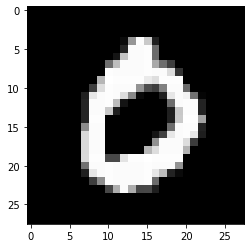

In [12]:
one_batch = next(iter(test_loader))
k = 3
one_image = one_batch[0][k]
one_label = one_batch[1][k]


one_image_npy = one_image.squeeze().numpy()
plt.imshow(one_image_npy, cmap='gray')

image = one_image.reshape(1,28*28).to(device)
label = one_label.to(device)
print(one_label)
